# Import libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
from tensorflow.keras import layers

# Import dataset

In [3]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu")

dataset_path = "../datasets/auto_mpg/auto-mpg.data"
# ../datasets/auto_mpg
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight",\
               "Acceleration", "Model Year", "Origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values= "?", comment="\t",
                         sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()

In [4]:
dataset.head(-1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1


# Data manipulation

In [5]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## fix missing values

In [6]:
dataset.Horsepower.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: Horsepower, Length: 398, dtype: bool

In [7]:
dataset.Horsepower.isnull().sum()

6

get indexes of the missing values of a column (Horsepower)

In [8]:
dataset[dataset.Horsepower.isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [9]:
dataset[dataset.Horsepower.isnull()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [10]:
dataset[dataset.Horsepower.isnull()].index.to_list()

[32, 126, 330, 336, 354, 374]

In [11]:
hp_mi = dataset[dataset.Horsepower.isnull()].index.to_list()

##### fill with mean

In [12]:
# dataset.Horsepower.loc[hp_mi] = dataset.Horsepower.mean()

In [13]:
dataset.Horsepower.loc[hp_mi]

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: Horsepower, dtype: float64

dataset.plot(y='Horsepower')
plt.show()

dataset.plot(y='Horsepower', x='Model Year', kind='scatter')
plt.show()

dataset.plot(y='Horsepower', x='Weight', kind='scatter')
plt.show()

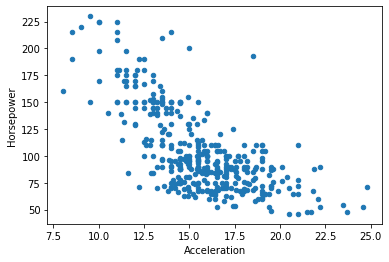

In [14]:
dataset.plot(y='Horsepower', x='Acceleration', kind='scatter')
plt.show()

In [15]:
dataset.loc[hp_mi]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


### linear regression for missing value

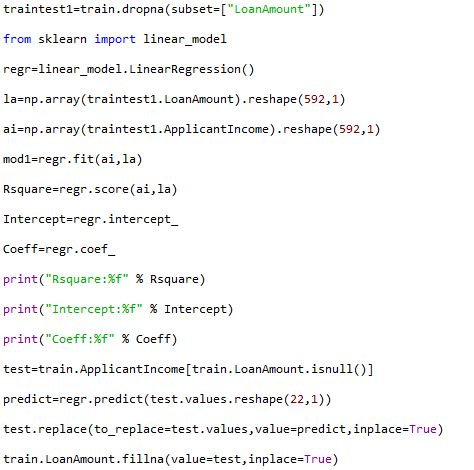

In [16]:
import numpy as np

In [17]:
dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]

392

In [18]:
train_mv_y = np.array(dataset.dropna(subset=['Horsepower'])['Horsepower']).reshape(int(dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]), 1)
train_mv_x = np.array(dataset.dropna(subset=['Horsepower'])['Weight']).reshape(int(dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]), 1)
print(type(train_mv_x))
print(type(train_mv_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
from sklearn import linear_model
regr_mv = linear_model.LinearRegression()

In [20]:
mv_model = regr_mv.fit(X=train_mv_x, y=train_mv_y)

In [21]:
score_r_square = regr_mv.score(X=train_mv_x, y=train_mv_y)

In [22]:
intercept_mv = regr_mv.intercept_

In [23]:
coef_mv = regr_mv.coef_

In [24]:
print(f"score_r_square: {score_r_square}")
print(f"intercept_mv: {intercept_mv}")
print(f"coef_mv: {coef_mv}")

score_r_square: 0.74742549968982
intercept_mv: [-12.1834847]
coef_mv: [[0.03917702]]


In [25]:
regr_mv.predict(np.array(dataset.Weight.loc[hp_mi]).reshape(len(hp_mi),1))

array([[ 67.97269639],
       [100.45044523],
       [ 59.70634536],
       [101.6257558 ],
       [ 78.70719963],
       [106.71876829]])

In [26]:
dataset.Horsepower.loc[hp_mi] = regr_mv.predict(np.array(dataset.Weight.loc[hp_mi]).reshape(len(hp_mi),1)).reshape(6,)

/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
dataset.Horsepower.describe()

count    398.000000
mean     104.188898
std       38.330757
min       46.000000
25%       75.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

## we do one_hot_encoding to categorical data

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
dataset.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

one_hot_encoder_origin = OneHotEncoder(handle_unknown='ignore')
# dataset.Origin = one_hot_encoder_origin.fit_transform(dataset.Origin)
dataset.Origin = one_hot_encoder_origin.fit_transform(dataset.Origin.values.reshape(-1,1)).toarray()


In [30]:
pd.get_dummies(dataset.Origin).iloc[:,0]
pd.get_dummies(dataset.Origin).iloc[:,1]
pd.get_dummies(dataset.Origin).iloc[:,2]

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Name: 3, Length: 398, dtype: uint8

In [31]:
origin_col_names = []
for i in list(pd.get_dummies(dataset.Origin).columns):
    print (f"origin_{i}")
    origin_col_names.append(f"origin_{i}")
origin_col_names

origin_1
origin_2
origin_3


['origin_1', 'origin_2', 'origin_3']

In [32]:
dataset[origin_col_names[0]] = pd.get_dummies(dataset.Origin).iloc[:,0]
dataset[origin_col_names[1]] = pd.get_dummies(dataset.Origin).iloc[:,1]
dataset[origin_col_names[2]] = pd.get_dummies(dataset.Origin).iloc[:,2]

In [33]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0


In [34]:
dataset = dataset.drop(columns=['Origin'])

In [35]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


## Splitting the data

## CHECK DISTRIBUTIONS

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

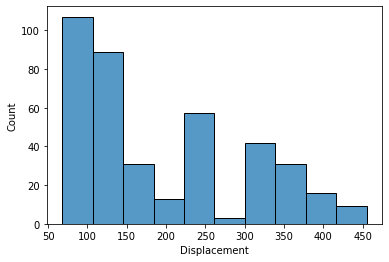

In [36]:
sns.histplot(data=dataset, x=dataset.Displacement)

<AxesSubplot:xlabel='MPG', ylabel='Count'>

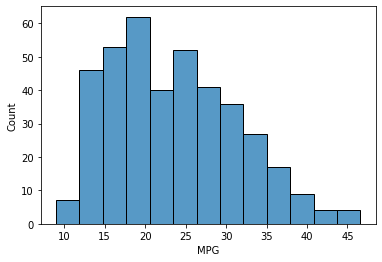

In [37]:
sns.histplot(data=dataset, x=dataset.MPG)

<AxesSubplot:xlabel='MPG', ylabel='Count'>

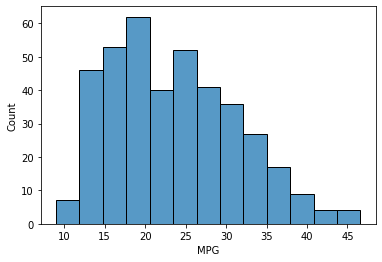

In [38]:
sns.histplot(data=dataset, x=dataset.MPG)

In [39]:
dataset.columns.to_list()

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'origin_1',
 'origin_2',
 'origin_3']

/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

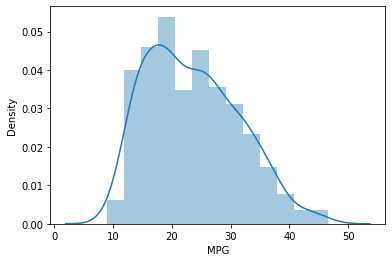

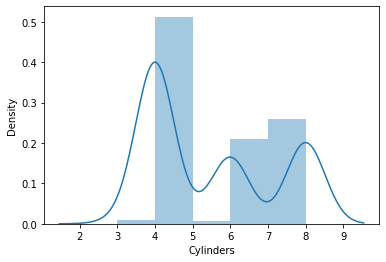

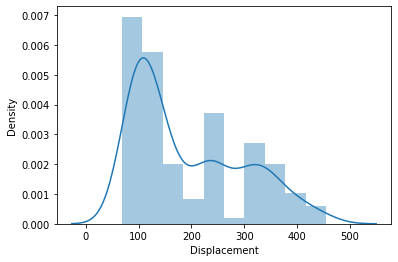

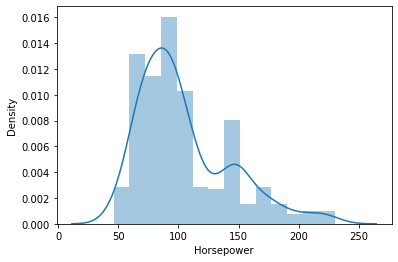

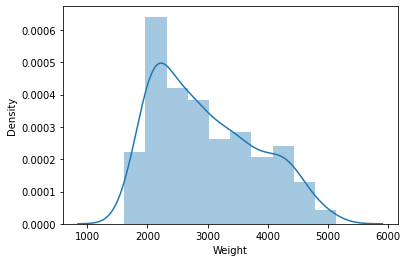

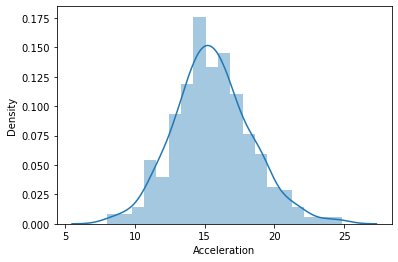

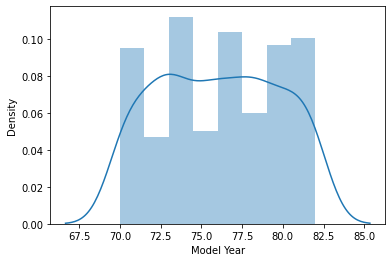

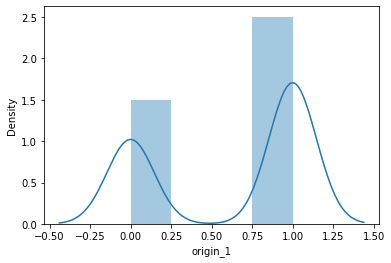

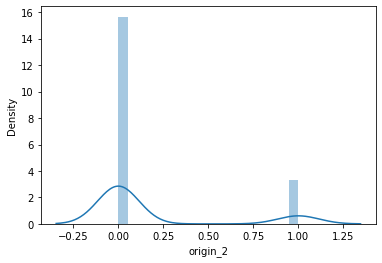

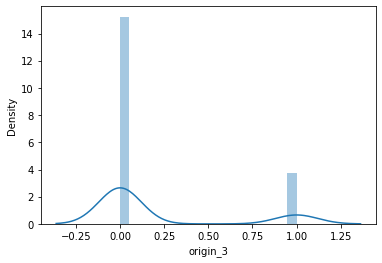

In [40]:
for i, col in enumerate(dataset.columns):
    plt.figure(i)
    sns.distplot(dataset[col])

In [41]:
import math
elements_each_row = 4
total_rows = math.ceil(dataset.shape[1] / elements_each_row)
last_row_elements = dataset.shape[1] % elements_each_row

In [42]:
dataset.hist

<bound method hist_frame of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  origin_1  origin_2  origin_3  
0            70         1         0         0  
1          

In [43]:
%matplotlib inline

In [44]:
def show_distributions(df, fig_size_x, fig_size_y, kind='hist'):
    #total_columns = df.shape[1]
    # 4 columns in each row
    import math
    elements_each_row = 4
    total_rows = math.ceil(df.shape[1] / elements_each_row)
    last_row_elements = df.shape[1] % elements_each_row
    
    fig, axes = plt.subplots(total_rows, elements_each_row)
    fig = plt.figure(figsize=(fig_size_x,fig_size_y))
    fig.suptitle('1 row x 2 columns axes with no data')
    
    if kind == 'hist':
        for i, feature in enumerate(df.columns):
            axes = fig.add_subplot(total_rows, elements_each_row, i+1)
            sns.histplot(data=df, ax=axes, x=df[feature])
    
    if kind == 'dist':
        for i, feature in enumerate(df.columns):
            axes = fig.add_subplot(total_rows, elements_each_row, i+1)
            sns.distplot(df[feature])
    
    plt.show()

In [45]:
# from visualization_utility_functions import show_distributions

/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

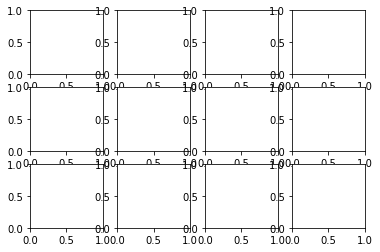

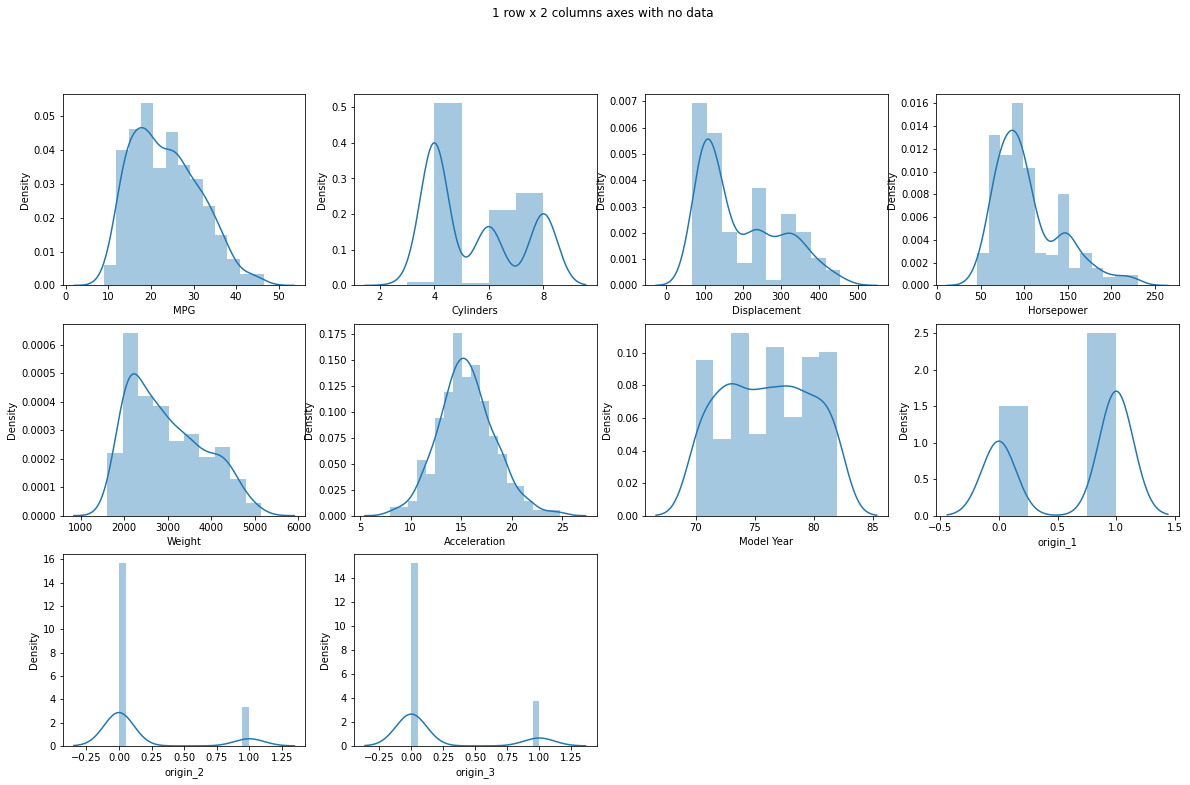

In [46]:
show_distributions(dataset, 20, 12, 'dist')

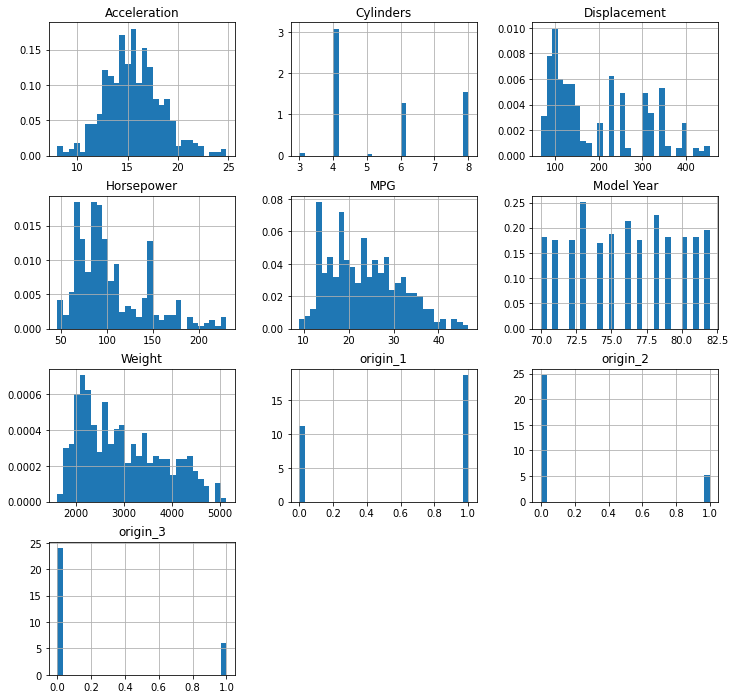

In [47]:
dataset.hist(bins=30, figsize=(12,12), density=True)
plt.show()

(0.0, 523.0)

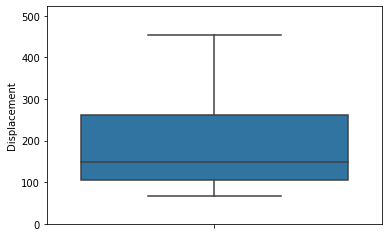

In [48]:
sns.boxplot(y=dataset.Displacement)
plt.ylim(top=int(dataset.Displacement.max() + (dataset.Displacement.max() * 0.15)),\
         bottom=int(dataset.Displacement.min() - (dataset.Displacement.max() * 0.15)))

In [49]:
# from visualization_utility_functions import plot_box

(4.0, 28.0)

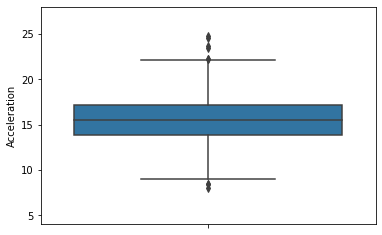

In [50]:
sns.boxplot(y=dataset.Acceleration)
plt.ylim(top=int(dataset.Acceleration.max() + (dataset.Acceleration.max() * 0.15)),\
         bottom=int(dataset.Acceleration.min() - (dataset.Acceleration.max() * 0.15)))

<AxesSubplot:ylabel='Acceleration'>

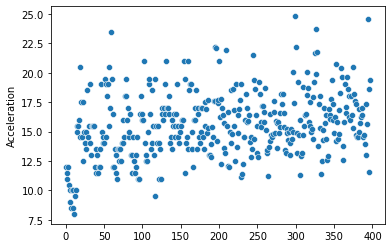

In [51]:
sns.scatterplot(y=dataset.Acceleration, x=dataset.index)

## Standardizing the data
seperate one hot encoded data and normalize the rest

In [52]:
from sklearn.preprocessing import minmax_scale

In [53]:
col_names_x = ['Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year','origin_1', 'origin_2', 'origin_3']

In [54]:
y = dataset.drop(columns=col_names_x)
X = dataset[col_names_x]

In [55]:
X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [56]:
X_origins = X[['origin_1', 'origin_2', 'origin_3']]

In [57]:
X_origins

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [58]:
X = X.drop(columns=['origin_1', 'origin_2', 'origin_3'])

In [59]:
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82
394,4,97.0,52.0,2130.0,24.6,82
395,4,135.0,84.0,2295.0,11.6,82
396,4,120.0,79.0,2625.0,18.6,82


In [60]:
# X = minmax_scale(X)
def normalization(x):
    return (x - x.mean()) / x.mean()

In [61]:
X = normalization(X)

In [62]:
y = normalization(y)

In [63]:
X = X.merge(X_origins, left_index=True, right_index=True)
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin_1,origin_2,origin_3
0,0.466605,0.587171,0.247734,0.179629,-0.229193,-0.079069,1,0,0
1,0.466605,0.809479,0.583662,0.243257,-0.261310,-0.079069,1,0,0
2,0.466605,0.644041,0.439693,0.156737,-0.293427,-0.079069,1,0,0
3,0.466605,0.571661,0.439693,0.155727,-0.229193,-0.079069,1,0,0
4,0.466605,0.561322,0.343713,0.161113,-0.325543,-0.079069,1,0,0
...,...,...,...,...,...,...,...,...,...
393,-0.266697,-0.276209,-0.174576,-0.060740,0.002050,0.078805,1,0,0
394,-0.266697,-0.498516,-0.500907,-0.282931,0.580155,0.078805,0,1,0
395,-0.266697,-0.302058,-0.193772,-0.227383,-0.254886,0.078805,1,0,0
396,-0.266697,-0.379607,-0.241762,-0.116288,0.194752,0.078805,1,0,0


## split into train and test

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build and compile the model

In [66]:
def scratch_model(X_train):
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',
                    optimizer=optimizer,
                    metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [67]:
model = scratch_model(X_train)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# Train the model

## create call back for printing dot while model is training

In [69]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
            print('.', end='')

In [70]:
EPOCHS = 1000

In [71]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    validation_split=0.15,
                    verbose=0,
                    callbacks=[PrintDot()])


.
.
.
.
.
.
.
.
.
.

In [72]:
hist = pd.DataFrame(history.history)

In [73]:
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,0.070435,0.205565,0.070435,0.045829,0.168739,0.045829
1,0.035636,0.134644,0.035636,0.041475,0.161787,0.041475
2,0.032309,0.126343,0.032309,0.040254,0.156915,0.040254
3,0.028868,0.120334,0.028868,0.036398,0.152707,0.036398
4,0.027946,0.118638,0.027946,0.039084,0.149430,0.039084
...,...,...,...,...,...,...
995,0.002058,0.029496,0.002058,0.016463,0.098253,0.016463
996,0.002214,0.031724,0.002214,0.017400,0.098667,0.017400
997,0.001737,0.026907,0.001737,0.016825,0.096059,0.016825
998,0.001867,0.028365,0.001867,0.017252,0.099493,0.017252


In [74]:
def plot_training_history(history):
      hist = pd.DataFrame(history.history)
      hist['epoch'] = history.epoch

      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Abs Error [MPG]')
      plt.plot(hist['epoch'], hist['mean_absolute_error'],
       label='Train Error')
      plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
       label = 'Val Error')
      plt.ylim([0,5])
      plt.legend()

      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Square Error [$MPG^2$]')
      plt.plot(hist['epoch'], hist['mean_squared_error'],
       label='Train Error')
      plt.plot(hist['epoch'], hist['val_mean_squared_error'],
       label = 'Val Error')
      plt.ylim([0,20])
      plt.legend()
      plt.show()

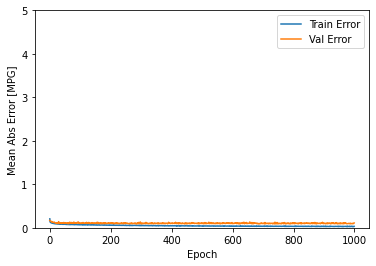

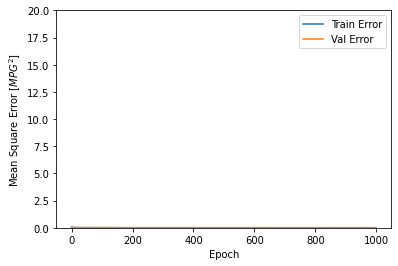

In [75]:
plot_training_history(history)

In [76]:
test_predictions = model.predict(X_test).flatten()

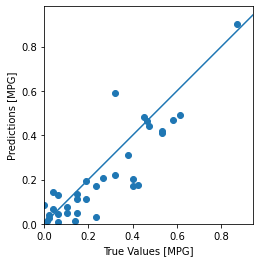

In [78]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()